In [2]:
import numpy as np
X = 2 * np.random.rand(100,1)
y  = 4+3*X + np.random.randn(100,1)

In [3]:
X_b = np.c_[np.ones((100,1)),X]
# theta = (XtX)sup(-1)Xty (t = transpose)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [4]:
theta_best

array([[3.95968276],
       [3.01837734]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.95968276],
       [9.99643745]])

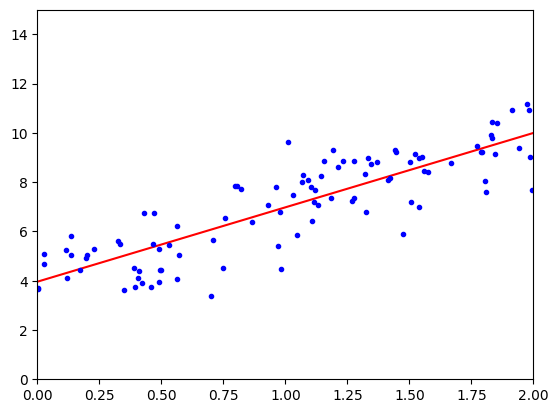

In [6]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.95968276]), array([[3.01837734]]))

In [8]:
lin_reg.predict(X_new)

array([[3.95968276],
       [9.99643745]])

In [9]:
theta_best_svd,residuals,rank,s = np.linalg.lstsq(X_b,y,rcond = 1e-6)

In [10]:
theta_best_svd# theta = Xsup(+)y Xsup(+) is the pseudoinverse of x

array([[3.95968276],
       [3.01837734]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.95968276],
       [3.01837734]])

In [12]:
eta = 0.1
n_iterations = 1000
m=100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta * gradients

In [13]:
theta

array([[3.95968276],
       [3.01837734]])

In [14]:
n_epochs = 50
t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [15]:
theta

array([[3.97796562],
       [3.0286768 ]])

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.97876081]), array([3.03643743]))

In [18]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.7646828])

In [20]:
X_poly[0]

array([-0.7646828 ,  0.58473979])

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.03264279]), array([[0.96050318, 0.53223531]]))

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learninng_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val") 

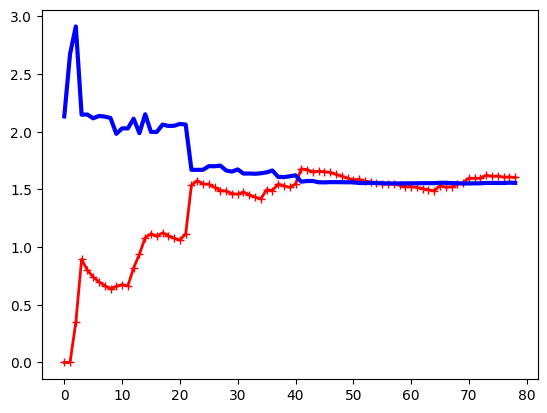

In [23]:
lin_reg = LinearRegression()
plot_learninng_curves(lin_reg,X,y)

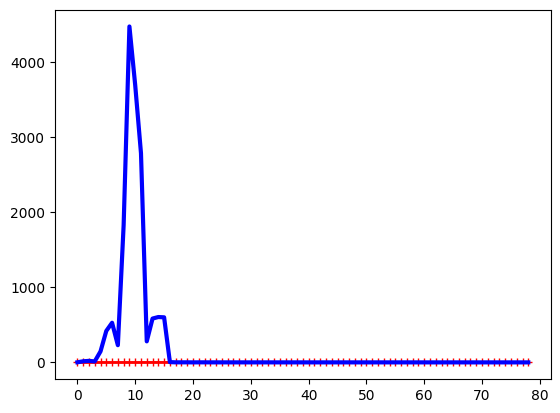

In [24]:
from sklearn.pipeline import Pipeline
Polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),


])
plot_learninng_curves(Polynomial_regression,X,y)

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([4.74004982])

In [26]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.71931042])

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.68074952])

In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.68852796])

In [32]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [34]:
X= mnist["data"] 
y= mnist["target"]
X_train,X_val,y_train,y_val = X[:60000],X[60000:],y[:60000],y[60000:]


In [38]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
            
    ("std_scaler",StandardScaler())

])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1,tol=None,warm_start=True
                       ,penalty=None,learning_rate="constant",eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(10):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
best_model = clone(sgd_reg)

In [39]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=None, warm_start=True)

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [42]:
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int64)

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

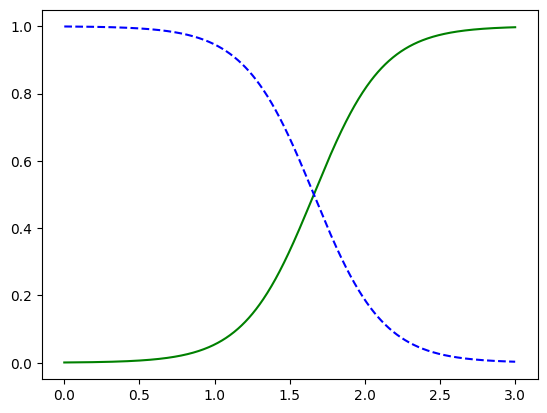

In [44]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba  = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [45]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [50]:
x = iris["data"][:,(2,3)]
y = iris["target"]
softmax_reg = LogisticRegression(multi_class = "multinomial",solver = "lbfgs",C=10)
softmax_reg.fit(x,y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [51]:
softmax_reg.predict([[5, 2]])



array([2])

In [52]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])